In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import numpy as np

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns:
    df.loc[df[col] == 0, col] = np.NaN

In [6]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.reset_index(inplace=True)

In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_depth=10,        # Maximum depth of the tree
                                  min_samples_split=5, # Minimum samples required to split a node
                                  min_samples_leaf=4)  # Minimum samples required at each leaf node

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

NameError: name 'data' is not defined

In [105]:
# Regressão Logística

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print(X_test_scaled[0])
print(y_pred_log[0])
print(list(y_test)[0])

/Users/pnferreira-m1/anaconda3/envs/koru/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyError: 0

In [106]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print(X_test_scaled[0])
print(y_pred_log[0])
print(list(y_test)[0])

KeyError: 0

In [107]:
# Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=7)
arvore.fit(X_train_scaled, y_train)

y_pred_arvore = arvore.predict(X_test_scaled)

print(X_test_scaled[0])
print(y_pred_log[0])
print(list(y_test)[0])

KeyError: 0

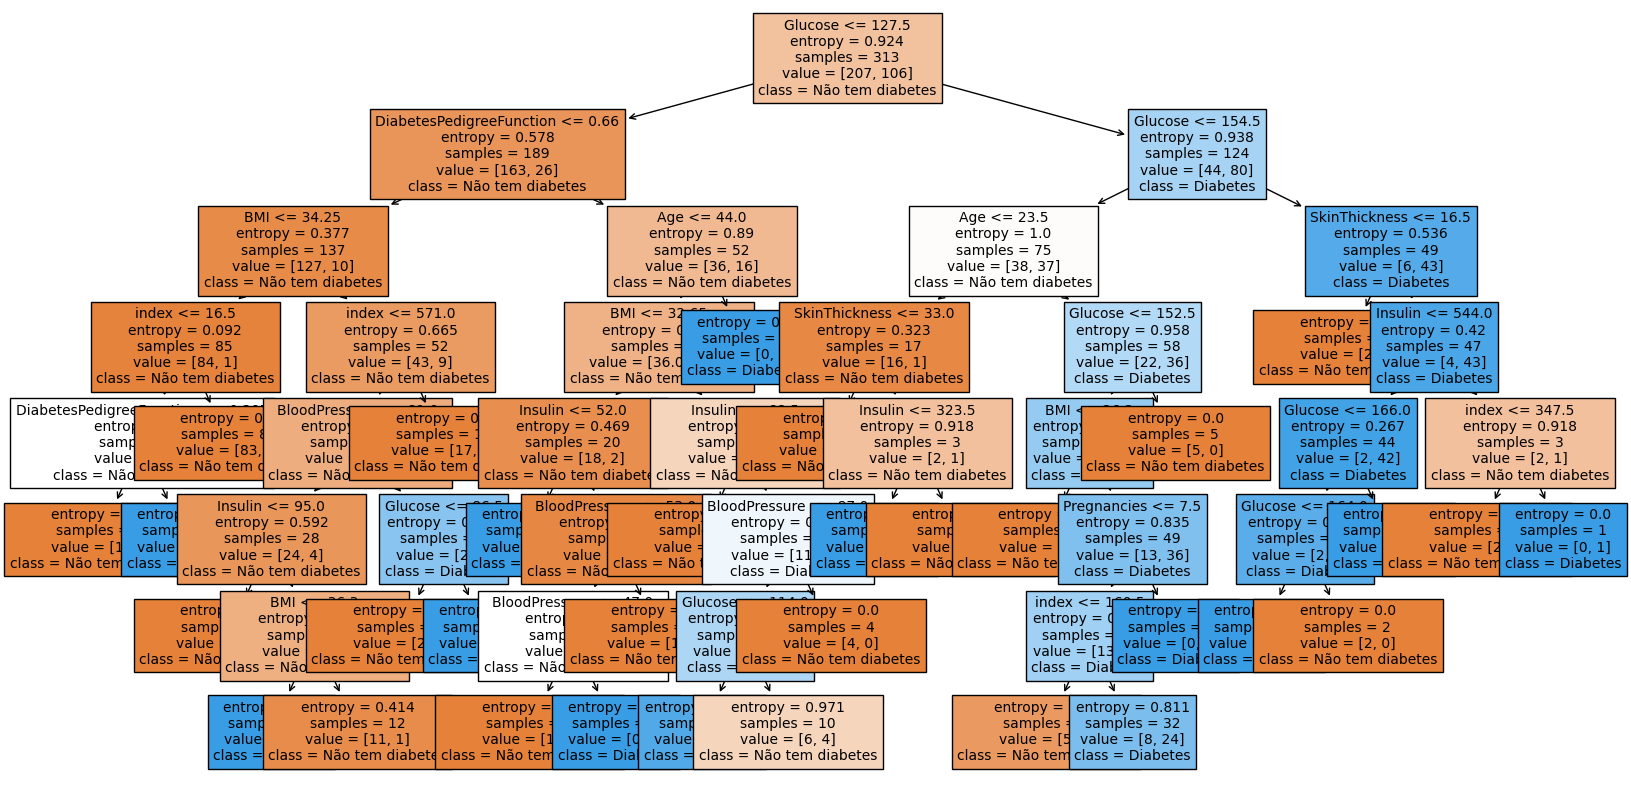

In [108]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
tree_plot = plot_tree(arvore, filled=True, feature_names=X.columns, class_names=['Não tem diabetes', 'Diabetes'], fontsize=10)

plt.show()

In [111]:
from sklearn.svm import SVC

svm = SVC(random_state=42, kernel='poly')
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

#print(X_test_scaled[0])
#print(y_pred_log[0])
#print(list(y_test)[0])

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log_reg = confusion_matrix(y_test, y_pred_log)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_arvore = confusion_matrix(y_test, y_pred_arvore)
cm_svm = confusion_matrix(y_test, y_pred_svm)

titles = ['log', 'knn', 'arvore', 'svm']

matrizes = [cm_log_reg, cm_knn, cm_arvore, cm_svm]
#for i, matrix in enumerate(matrizes):
    #disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    #disp.plot()



In [113]:
from sklearn.metrics import classification_report


print('Log_reg\n', classification_report(y_test, y_pred_log))
print('knn\n', classification_report(y_test, y_pred_knn))
print('Arvore\n', classification_report(y_test, y_pred_arvore))
print('svm\n', classification_report(y_test, y_pred_svm))

Log_reg
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        55
           1       0.65      0.62      0.64        24

    accuracy                           0.78        79
   macro avg       0.75      0.74      0.74        79
weighted avg       0.78      0.78      0.78        79

knn
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        55
           1       0.59      0.54      0.57        24

    accuracy                           0.75        79
   macro avg       0.70      0.69      0.69        79
weighted avg       0.74      0.75      0.74        79

Arvore
               precision    recall  f1-score   support

           0       0.78      0.71      0.74        55
           1       0.45      0.54      0.49        24

    accuracy                           0.66        79
   macro avg       0.61      0.63      0.62        79
weighted avg       0.68      0.66      0.67        7